In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow.examples.tutorials.mnist import input_data

In [4]:
# MNIST 10 Value
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [6]:
# Network Parameters
input_dim = 784   #(img shape: 28*28)
hid1_dim = 512
hid2_dim = 512
hid3_dim = 100
output_dim = 10

# tf Graph input
x = tf.placeholder("float", [None, input_dim])
y = tf.placeholder("float", [None, output_dim])

In [7]:
# Store layers weight & bias in Dictionary
weights = {
    'h1': tf.Variable(tf.random_normal([input_dim, hid1_dim])),
    'h2': tf.Variable(tf.random_normal([hid1_dim, hid2_dim])),
    'h3': tf.Variable(tf.random_normal([hid2_dim, hid3_dim])),
    'out': tf.Variable(tf.random_normal([hid3_dim, output_dim]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([hid1_dim])),
    'b2': tf.Variable(tf.random_normal([hid2_dim])),
    'b3': tf.Variable(tf.random_normal([hid3_dim])),
    'out': tf.Variable(tf.random_normal([output_dim]))
}

In [8]:
# Model
layer1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
layer2 = tf.add(tf.matmul(layer1, weights['h2']), biases['b2'])
layer3 = tf.add(tf.matmul(layer2, weights['h3']), biases['b3'])
res = tf.add(tf.matmul(layer3, weights['out']), biases['out'])

print(res)

Tensor("Add_3:0", shape=(?, 10), dtype=float32)


In [11]:
# Hyper Parameters
lr = 0.05
epoch = 2500
batch = 128
display = 10

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=res, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=lr)
train_op = optimizer.minimize(loss_op)

# Evaluate Model  (cy = correct y)
cy = tf.equal(tf.math.argmax(res,1), tf.math.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(cy, tf.float32))

# Initialize the Variables
init = tf.global_variables_initializer()

In [12]:
taccuracy = []
tloss = []
tidx = []

# Start Training
with tf.Session() as sess:
    # Run initializer
    sess.run(init)
        
    for ep in range(epoch):
        batchx , batchy = mnist.train.next_batch(batch)
        
        # Run Optimization (BackProp)
        sess.run(train_op, feed_dict={x: batchx, y: batchy})
        
        if((ep % display) == 0):
            # Calculate Batch Loss and Accuracy
            loss, acc = sess.run([loss_op, accuracy], feed_dict={x:batchx, y: batchy})
            
            tidx.append(ep)
            tloss.append(loss)
            taccuracy.append(acc)
            
            print('Epoch: %d, Loss: %f, Accuracy: %f' % (ep, loss, acc))
    
    tacc = sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels})
    print('Testing Accuracy: ', tacc)

Epoch: 0, Loss: 237029.281250, Accuracy: 0.312500
Epoch: 10, Loss: 54917.429688, Accuracy: 0.687500
Epoch: 20, Loss: 30827.300781, Accuracy: 0.812500
Epoch: 30, Loss: 22799.437500, Accuracy: 0.843750
Epoch: 40, Loss: 13503.327148, Accuracy: 0.820312
Epoch: 50, Loss: 14958.229492, Accuracy: 0.796875
Epoch: 60, Loss: 5274.453613, Accuracy: 0.890625
Epoch: 70, Loss: 7918.596680, Accuracy: 0.851562
Epoch: 80, Loss: 7802.402344, Accuracy: 0.843750
Epoch: 90, Loss: 3260.477783, Accuracy: 0.890625
Epoch: 100, Loss: 4409.092773, Accuracy: 0.851562
Epoch: 110, Loss: 6630.277344, Accuracy: 0.835938
Epoch: 120, Loss: 4054.630859, Accuracy: 0.867188
Epoch: 130, Loss: 2483.353027, Accuracy: 0.851562
Epoch: 140, Loss: 2810.042236, Accuracy: 0.898438
Epoch: 150, Loss: 1976.523438, Accuracy: 0.882812
Epoch: 160, Loss: 1428.769287, Accuracy: 0.890625
Epoch: 170, Loss: 2297.317871, Accuracy: 0.843750
Epoch: 180, Loss: 2801.959961, Accuracy: 0.875000
Epoch: 190, Loss: 1452.394287, Accuracy: 0.882812
Epoc

Epoch: 1680, Loss: 242.601990, Accuracy: 0.867188
Epoch: 1690, Loss: 302.993591, Accuracy: 0.804688
Epoch: 1700, Loss: 191.949341, Accuracy: 0.914062
Epoch: 1710, Loss: 218.345383, Accuracy: 0.867188
Epoch: 1720, Loss: 280.234680, Accuracy: 0.851562
Epoch: 1730, Loss: 248.664505, Accuracy: 0.875000
Epoch: 1740, Loss: 178.425674, Accuracy: 0.875000
Epoch: 1750, Loss: 208.670898, Accuracy: 0.875000
Epoch: 1760, Loss: 227.452911, Accuracy: 0.929688
Epoch: 1770, Loss: 245.135773, Accuracy: 0.867188
Epoch: 1780, Loss: 161.646179, Accuracy: 0.875000
Epoch: 1790, Loss: 91.296074, Accuracy: 0.906250
Epoch: 1800, Loss: 222.435837, Accuracy: 0.867188
Epoch: 1810, Loss: 81.922668, Accuracy: 0.921875
Epoch: 1820, Loss: 169.962524, Accuracy: 0.890625
Epoch: 1830, Loss: 110.662979, Accuracy: 0.921875
Epoch: 1840, Loss: 362.443695, Accuracy: 0.875000
Epoch: 1850, Loss: 131.362045, Accuracy: 0.945312
Epoch: 1860, Loss: 149.534012, Accuracy: 0.898438
Epoch: 1870, Loss: 176.554947, Accuracy: 0.843750
Ep

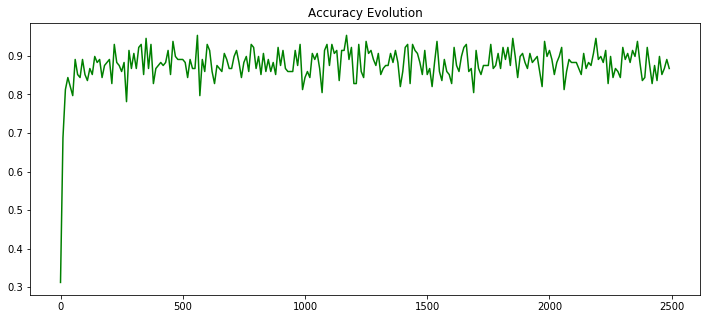

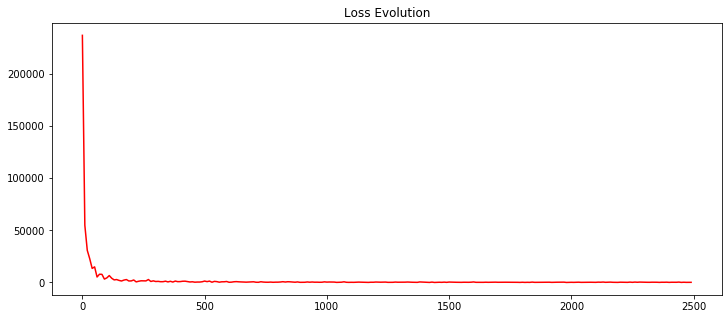

In [13]:
# Plot accuracy and loss

fig = plt.figure(figsize=(12,5))
plt.title('Accuracy Evolution')
plt.plot(tidx, taccuracy, color='green')
plt.show()

fig = plt.figure(figsize=(12,5))
plt.title('Loss Evolution')
plt.plot(tidx, tloss, color='red')
plt.show()